# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [551]:
data = pd.read_csv(
    "train.csv",
    index_col=0,
)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [202]:
train = data.sample(n=624)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S
485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S


In [203]:
test = pd.concat([data, train]).drop_duplicates(keep=False)
test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [204]:
features_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [205]:
train_features, train_target = get_features_and_target(train)
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
543,3,female,11.0,4,2,31.2750
698,3,female,NaN,0,0,7.7333
487,1,female,35.0,1,0,90.0000
248,2,female,24.0,0,2,14.5000
177,3,male,NaN,3,1,25.4667
...,...,...,...,...,...,...
663,1,male,47.0,0,0,25.5875
485,1,male,25.0,1,0,91.0792
798,3,female,31.0,0,0,8.6833


In [206]:
test_features, test_target = get_features_and_target(test)
test_features

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,male,22.0,1,0,7.2500
2,1,female,38.0,1,0,71.2833
7,1,male,54.0,0,0,51.8625
8,3,male,2.0,3,1,21.0750
12,1,female,58.0,0,0,26.5500
...,...,...,...,...,...,...
872,1,female,47.0,1,1,52.5542
874,3,male,47.0,0,0,9.0000
877,3,male,20.0,0,0,9.8458


#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Выявим признаки, наиболее сильно связанные с целевым значением. Для этого построим матрицу корреляций, предварительно подправив столбец полов. Для лучшей визуаизации используем тепловую карту.

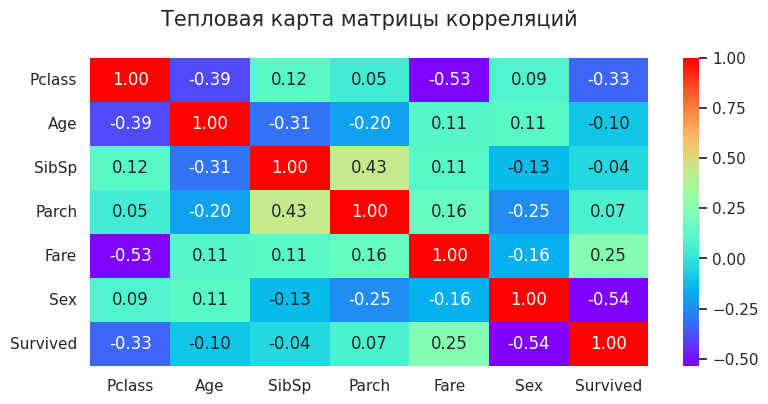

In [552]:
train_sex = train_features["Sex"] == "male"
df_train = pd.concat(
    [train_features.drop("Sex", axis=1), train_sex, train_target], axis=1
)

corr_matrix = df_train.corr()
corr_matrix

with sns.plotting_context("notebook"):
    plt.figure(figsize=(9, 4))
    sns.heatmap(corr_matrix, annot=True, cmap="rainbow", fmt=".2f")
    plt.title("Тепловая карта матрицы корреляций\n", fontsize=15)

Как видим, наиболее важные признаки - Пол, Класс и Стоимость билета. Поэтому будем ориентироваться на них при построении дальнейших предсказений.

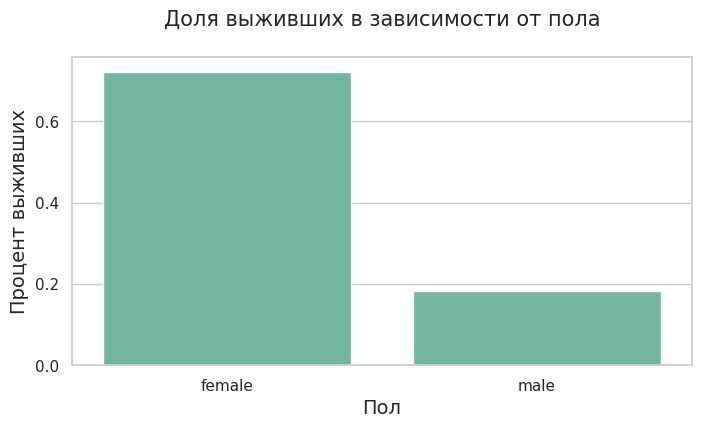

In [297]:
sex_surv_rate = (
    pd.concat([train_features, train_target], axis=1).groupby("Sex")["Survived"].mean()
)

with sns.plotting_context("notebook"), sns.axes_style("whitegrid"):
    plt.figure(figsize=(8, 4))
    sns.barplot(sex_surv_rate)
    plt.title("Доля выживших в зависимости от пола\n", fontsize=15)
    plt.xlabel("Пол", fontsize=14)
    plt.ylabel("Процент выживших", fontsize=14)

Данный график явно показывает зависимость выживаемости от пола: выжило 70% женщин и лишь 20% - мужчин. Вероятнее всего, это связано с тем, что в спасательные шлюпки сажали в первую очередь женщин и детей.

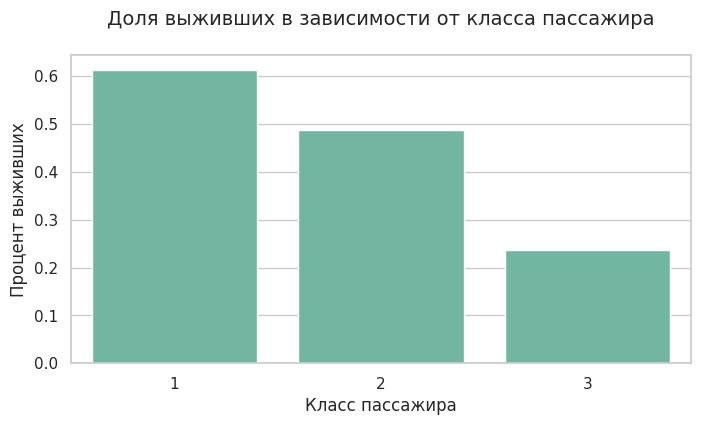

In [298]:
pclass_surv_rate = df_train.groupby("Pclass")["Survived"].mean()

with sns.plotting_context("notebook"), sns.axes_style("whitegrid"):
    plt.figure(figsize=(8, 4))
    sns.barplot(pclass_surv_rate)
    plt.title("Доля выживших в зависимости от класса пассажира\n", fontsize=14)
    plt.xlabel("Класс пассажира")
    plt.ylabel("Процент выживших")

Из данного графика ясно, что чем выше класс пассажира, тем больше для него шанс выжить.

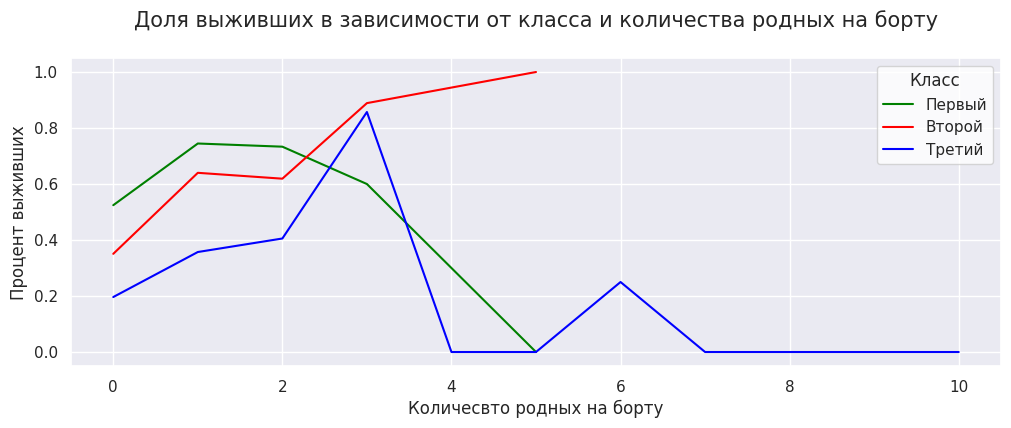

In [542]:
train_relatives = df_train.copy()
train_relatives["Relatives"] = df_train.Parch + df_train.SibSp
train_relatives = train_relatives.drop(["Parch", "SibSp"], axis=1)
train_relatives

pclass_parch_surv_rate = train_relatives.groupby(["Pclass", "Relatives"])[
    "Survived"
].mean()
pclass_parch_surv_rate

with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 4))
    green = sns.lineplot(pclass_parch_surv_rate[1], color="green", label="Первый")
    red = sns.lineplot(pclass_parch_surv_rate[2], color="red", label="Второй")
    blue = sns.lineplot(pclass_parch_surv_rate[3], color="blue", label="Третий")
    plt.legend(title="Класс").get_frame().set_facecolor("white")
    plt.title(
        "Доля выживших в зависимости от класса и количества родных на борту\n",
        fontsize=15,
    )
    plt.xlabel("Количесвто родных на борту")
    plt.ylabel("Процент выживших")

Данный график показывает зависимость выживаемости от класса пассажира и количества. А именно, пассажиры первого класса чаще выживали, имея одного, двух родных на борту. Пассажирам второго класса чаще удавалось выжить, имея от трех до пяти родных. Если же пассажир был поселен в третий класс, то больше шансов выжить у него было, если он имел ровно трех родных на борту.

 Полученных графиков достаточно для визуализации данных и построения решающих деревьев.

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

В данном алгоритме я использовал евклидову метрику - самую очевидную на данный момент. 
Что же касается данных, их, конечно, стоит для начала отномрировать. Я не стал прибегать к сложным методам и просто поделил все данные на разность между максимиальным и минимальным значениями по каждому столбцу.

In [522]:
features_columns = ["Age", "Fare"]


def normalize(data):
    new_data = data[features_columns]
    new_data.loc[:, "Age"] /= data["Age"].max() - data["Age"].min()
    new_data.loc[:, "Fare"] /= data["Fare"].max() - data["Fare"].min()
    return new_data

In [523]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    dists = ((A[np.newaxis, :, :] - B[:, np.newaxis, :]) ** 2).sum(axis=2)
    return (np.argsort(dists) + 1)[: B.shape[0], :k]

In [524]:
def knn(features, train_features, train_target, k=1):
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    """

    features = normalize(features)
    train_features = normalize(train_features)

    nearest_neighbors = find_nearest_points(features.values, train_features.values, k)

    predicted = pd.Series(index=features.index, dtype="float64")

    for i in range(features.shape[0]):
        predicted.iloc[i] = train_target.iloc[nearest_neighbors[i]].mode()[0]
    return predicted

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

Анализ результатов и проверка качества при различных значениях гиперпараметра - в конце ноутбука. Не совсем понял, что имеется в виду в дынном пунтке.

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

Можно было бы учесть и другие признаки, однако могли возникнуть трудности с такими пунктами как "порт посадки", "класс пассажира", так как не совсем понятно, как задать метрику (отличается ли первый класс от второго сильнее, чем второй от третьего?); "номер билета", так как нужно его сначала распарсить, да и особой информации он, вероятно, не несет; "номер каюты", так как очень много пропусков (NaN) в данных. Тем не менее, использование некторых дополнительных признаков (при предварительной нормировке, конечно) могло улучшить качество предсказаний. Но в пространстве больших размерностей расстояния не так информативны, поэтому слишком много признаков - тоже не очень хорошо.

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Если у пассажира третий класс, то выживает он, если имеет троих родственников на борту.
Если у пассажира второй класс, то выживает он, если имеет от трех до пяти родственников на борту.
Если у пассажира первый класс, то выживает он, если имеет двоих или троих родственников на борту. 

**Дерево 2:**

Предполагаем, что женщины выжили, мужчины - нет

Реализуйте полученные деревья по шаблону

In [ ]:
def tree(features):
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """

    ...
    return predicted

In [463]:
def first_tree(features):
    return features.apply(
        lambda x: (
            1
            if x["Pclass"] == 1
            and 2 <= x["Parch"] + x["SibSp"] <= 3
            or x["Pclass"] == 2
            and 3 <= x["Parch"] + x["SibSp"] <= 5
            or x["Pclass"] == 3
            and x["Parch"] + x["SibSp"] == 3
            else 0
        ),
        axis=1,
    )

In [453]:
def second_tree(features):
    return features.apply(lambda x: 1 if x["Sex"] == "female" else 0, axis=1)

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Отношение числа совпавших прогнозов к числу всех прогнозов

Реализуйте данный критерий по шаблону

In [466]:
def criteria(target, predicted):
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """

    return (target == predicted).mean()

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [540]:
print(
    "Качество первого дерева: ",
    round(criteria(test_target, first_tree(test_features)), 2),
)
print(
    "Качество второго дерева: ",
    round(criteria(test_target, second_tree(test_features)), 2),
)

Качество первого дерева:  0.63
Качество второго дерева:  0.8


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

In [539]:
quality = []
for k in range(1, 11):
    quality.append(
        criteria(test_target, knn(test_features, train_features, train_target, k))
    )

round(max(quality), 2)

0.64

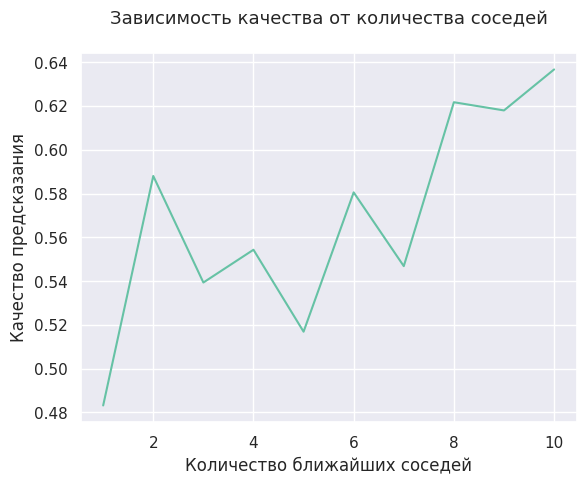

In [547]:
with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
    sns.lineplot(x=range(1, 11), y=quality)

    plt.xlabel("Количество ближайших соседей")
    plt.ylabel("Качество предсказания")
    plt.title("Зависимость качества от количества соседей\n", fontsize="13")

Как показывает график, наиболее точна наша модель при $k = 10$. При меньших значениях происходит переобучение, то есь модель слишком подстраивается под тренировочные данные и на тестовых работает не так. При бОльших же значениях гиперпараметра модель наоборот не улавливает те связи между признаками и целевой переменной, которые верны и для тренировочной, и для тестовой выборки. Заметим также, что при нечетных $k$ качество хуже, чем при четных. Можно предположить, что при равенстве "голосов" в пользу того или иного предсказания происходит случайный выбор из двух вариантов, и это идет модели на пользу (в случае с нечетным значеним гиперпараметра равенства голосов не происходит, так как предсказание бинарно: выжил/не выжил).

#### 6. Выводы

Итак, мы провели визуальный анализ данных, выявив наиболее значимые для выживания признаки: пол, класс и стоимость билета пассажира. По полученным наблюдениям мы построили два решающих дерева глубины 1 и 2, получив качество предсказания 80% и 63% соответсовенно. Во втором случае качество хуже, как я считаю, потому, что в данном случае было решено опираться по большей части на график, а не на здравый смысл. И, как показал результат, это было не лучшим решением, так как в графике вполне мог быть выброс, который мне не удалось выявить. Тем не менее, качество даже этого дерева совпало с качеством предсказания методом ближайщих соседей - 64%.